# 10.Binary-Classification-Titanic-Sample
This notebook is an example of the implementation in the Titanic competition using PyCaret.

Public Leaderboard Score：0.77990

In [1]:
# !pip install pycaret # To run on a Kaggle notebook, install by pip

In [2]:
import numpy as np 
import pandas as pd 
import pandas_profiling

In [3]:
train_data = pd.read_csv('./input/titanic/train.csv')
test_data  = pd.read_csv('./input/titanic/test.csv')
submission_data = pd.read_csv('./input/titanic/gender_submission.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.profile_report()

# Data setup with PyCaret

In [6]:
# Classification
from pycaret.classification import *

In [7]:
exp = setup(data=train_data, target='Survived', ignore_features = ['PassengerId', 'Name'], session_id=42) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Compare models

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.838000,0.000000,0.757600,0.817500,0.782800,0.654200
1,Logistic Regression,0.828300,0.865600,0.753400,0.797400,0.770800,0.634100
2,CatBoost Classifier,0.825200,0.871600,0.690800,0.833600,0.750300,0.618200
3,Light Gradient Boosting Machine,0.823500,0.864800,0.736600,0.794400,0.761600,0.622100
4,Gradient Boosting Classifier,0.815500,0.871800,0.682400,0.811000,0.738500,0.598000
5,Extreme Gradient Boosting,0.810700,0.860400,0.711600,0.783000,0.741400,0.593100
6,Extra Trees Classifier,0.807600,0.862500,0.703600,0.778300,0.735900,0.585600
7,Decision Tree Classifier,0.802600,0.783900,0.703100,0.764300,0.729600,0.575200
8,Random Forest Classifier,0.799500,0.848800,0.640900,0.800900,0.706300,0.558500
9,Ada Boost Classifier,0.796100,0.838700,0.694700,0.762500,0.723500,0.563000


# Tuning Model

In [9]:
tuned_catboost_model = tune_model('catboost', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.8873,0.7500,0.8182,0.7826,0.6580
1,0.8095,0.8937,0.5833,0.8750,0.7000,0.5685
2,0.8413,0.8985,0.6667,0.8889,0.7619,0.6465
3,0.8387,0.9125,0.6957,0.8421,0.7619,0.6416
4,0.8387,0.8679,0.5833,1.0000,0.7368,0.6318
5,0.9032,0.9079,0.7917,0.9500,0.8636,0.7896
6,0.7742,0.9062,0.6250,0.7500,0.6818,0.5090
7,0.7903,0.7813,0.6250,0.7895,0.6977,0.5405
8,0.8548,0.8618,0.7083,0.8947,0.7907,0.6819
9,0.8065,0.8163,0.6667,0.8000,0.7273,0.5792


# Plot Model

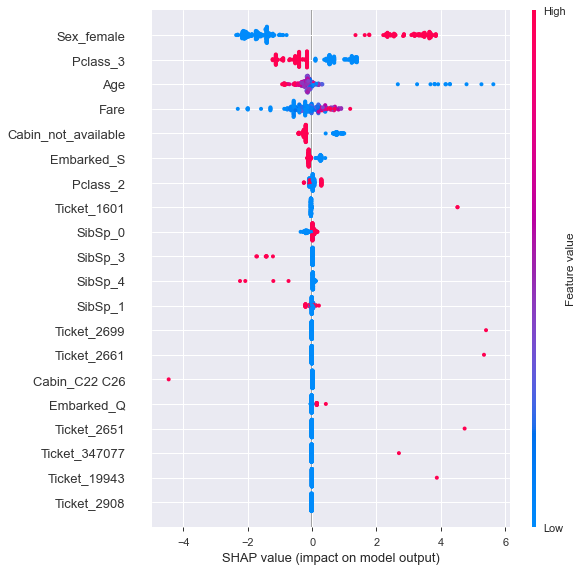

In [10]:
interpret_model(tuned_catboost_model)

# Ensemble(Blending)

In [11]:
blend_model = blend_models(fold=25)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.5556,0.8333,0.6667,0.5318
1,0.7600,0.0,0.7778,0.6364,0.7000,0.5033
2,0.9200,0.0,0.8889,0.8889,0.8889,0.8264
3,0.8000,0.0,0.6667,0.7500,0.7059,0.5552
4,0.8800,0.0,0.7778,0.8750,0.8235,0.7331
5,0.8400,0.0,0.6667,0.8571,0.7500,0.6350
6,0.8000,0.0,0.7778,0.7000,0.7368,0.5763
7,0.8000,0.0,0.5556,0.8333,0.6667,0.5318
8,0.8800,0.0,1.0000,0.7500,0.8571,0.7573
9,0.8400,0.0,0.7000,0.8750,0.7778,0.6552


# Ensemble(Stacking)

In [12]:
ridge_model = create_model('ridge', verbose=False)
catboost_model = create_model('catboost', verbose=False)
lr_model = create_model('lr', verbose=False)
lgbm_model = create_model('lightgbm', verbose=False)
et_model = create_model('et', verbose=False)
rf_model = create_model('rf', verbose=False)
gbc_model = create_model('gbc', verbose=False)
xgboost_model = create_model('xgboost', verbose=False)
dt_model = create_model('dt', verbose=False)
ada_model = create_model('ada', verbose=False)

In [ ]:
stack_model = stack_models([ridge_model, catboost_model, lr_model, lgbm_model, et_model, 
                            rf_model, gbc_model, xgboost_model, dt_model, ada_model], fold=20)

IntProgress(value=0, description='Processing: ', max=34)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:18:36
Status,. . . . . . . . . . . . . . . . . .,Evaluating XGBClassifier
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa


# Prediction

In [ ]:
# Run the inference with the best performing model you've tried
predictions = predict_model(blend_model, data=test_data)
predictions.head()

# Save to CSV

In [ ]:
submission_data['Survived'] = round(predictions['Label']).astype(int)
submission_data.to_csv('submission.csv',index=False)
submission_data.head()